In [19]:
# dependecies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from scipy import stats

In [24]:
# for all my plots
palette = ['#8F87B4', '#54724A', '#587958', '#ABCCA5', '#B1C7A4', '#7EA874', '#C3BAD9', '#BE8CC9', '#C588E1', '#c2c1e3']
customCmap = ListedColormap(palette)

In [3]:
data = pd.read_csv('personalFinanceDataset.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,age,gender,raceEthnicity,education,region,householdType,householdSize,career,...,totalExpenses,totalSavingsInvestments,monthlyCashFlow,housingRatio,debtToIncome,savingsInvestmentsRate,carPaymentRatio,monthsSaved,financialHealth,ageCategory
0,0,0,35,Female,White,High School,South,DINKS,2,Retail,...,5368.49,143.09,-2949.78,66.32,1.33,5.59,0.00,1.17,FinanciallyDistressed,30-35
1,1,1,65,Female,Black/African American,High School,South,Single,1,Retired,...,5258.28,0.00,-169.98,25.51,25.51,0.00,13.95,0.07,FinanciallyDistressed,60-65
2,2,2,50,Male,Other/Multiracial,Bachelor's,Midwest,SingleParent,3,Healthcare,...,6578.61,0.00,-1780.63,37.63,11.88,0.00,8.04,0.93,FinanciallyDistressed,45-50
3,3,3,40,Female,White,Bachelor's,West,Single,1,Sales,...,7676.07,954.95,-598.56,28.46,14.87,11.89,11.36,1.17,FinanciallyStable,35-40
4,4,4,30,Male,Black/African American,Some College/Associate's,Midwest,SmallFamily,4,Service,...,7640.68,254.91,-5375.15,57.12,27.03,10.11,15.16,1.37,FinanciallyDistressed,25-30


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 71 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0.1                3500 non-null   int64  
 1   Unnamed: 0                  3500 non-null   int64  
 2   age                         3500 non-null   int64  
 3   gender                      3500 non-null   object 
 4   raceEthnicity               3500 non-null   object 
 5   education                   3500 non-null   object 
 6   region                      3500 non-null   object 
 7   householdType               3500 non-null   object 
 8   householdSize               3500 non-null   int64  
 9   career                      3500 non-null   object 
 10  workArrangement             3500 non-null   object 
 11  annualIncome                3500 non-null   float64
 12  sideHustleIncome            3500 non-null   float64
 13  monthlyIncome               3500 

In [5]:
data = data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [6]:
data.head()

,age,gender,raceEthnicity,education,region,householdType,householdSize,career,workArrangement,annualIncome,...,totalExpenses,totalSavingsInvestments,monthlyCashFlow,housingRatio,debtToIncome,savingsInvestmentsRate,carPaymentRatio,monthsSaved,financialHealth,ageCategory
0,35,Female,White,High School,South,DINKS,2,Retail,Office,30741.640000,...,5368.49,143.09,-2949.78,66.32,1.33,5.59,0.00,1.17,FinanciallyDistressed,30-35
1,65,Female,Black/African American,High School,South,Single,1,Retired,Retired,61059.581194,...,5258.28,0.00,-169.98,25.51,25.51,0.00,13.95,0.07,FinanciallyDistressed,60-65
2,50,Male,Other/Multiracial,Bachelor's,Midwest,SingleParent,3,Healthcare,Office,57575.730000,...,6578.61,0.00,-1780.63,37.63,11.88,0.00,8.04,0.93,FinanciallyDistressed,45-50
3,40,Female,White,Bachelor's,West,Single,1,Sales,Office,96389.510000,...,7676.07,954.95,-598.56,28.46,14.87,11.89,11.36,1.17,FinanciallyStable,35-40
4,30,Male,Black/African American,Some College/Associate's,Midwest,SmallFamily,4,Service,Office,30245.270000,...,7640.68,254.91,-5375.15,57.12,27.03,10.11,15.16,1.37,FinanciallyDistressed,25-30


In [7]:
data.isnull().sum()

age                       0
gender                    0
raceEthnicity             0
education                 0
region                    0
                         ..
savingsInvestmentsRate    0
carPaymentRatio           0
monthsSaved               0
financialHealth           0
ageCategory               0
Length: 69, dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
# test; i just wanted to see what would happen
duplicatedRows = data[data.duplicated()]
duplicatedRows.head()

,age,gender,raceEthnicity,education,region,householdType,householdSize,career,workArrangement,annualIncome,...,totalExpenses,totalSavingsInvestments,monthlyCashFlow,housingRatio,debtToIncome,savingsInvestmentsRate,carPaymentRatio,monthsSaved,financialHealth,ageCategory


In [10]:
data.shape

(3500, 69)

In [ ]:
# quick numerical => categorical
data['ageCategory'] = pd.cut(data['age'], bins=[24, 30, 35, 40, 45, 50, 55, 60, 65, 70], labels=['25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70'])

In [12]:
# starting one hot encoding
data.head()

,age,gender,raceEthnicity,education,region,householdType,householdSize,career,workArrangement,annualIncome,...,totalExpenses,totalSavingsInvestments,monthlyCashFlow,housingRatio,debtToIncome,savingsInvestmentsRate,carPaymentRatio,monthsSaved,financialHealth,ageCategory
0,35,Female,White,High School,South,DINKS,2,Retail,Office,30741.640000,...,5368.49,143.09,-2949.78,66.32,1.33,5.59,0.00,1.17,FinanciallyDistressed,30-35
1,65,Female,Black/African American,High School,South,Single,1,Retired,Retired,61059.581194,...,5258.28,0.00,-169.98,25.51,25.51,0.00,13.95,0.07,FinanciallyDistressed,60-65
2,50,Male,Other/Multiracial,Bachelor's,Midwest,SingleParent,3,Healthcare,Office,57575.730000,...,6578.61,0.00,-1780.63,37.63,11.88,0.00,8.04,0.93,FinanciallyDistressed,45-50
3,40,Female,White,Bachelor's,West,Single,1,Sales,Office,96389.510000,...,7676.07,954.95,-598.56,28.46,14.87,11.89,11.36,1.17,FinanciallyStable,35-40
4,30,Male,Black/African American,Some College/Associate's,Midwest,SmallFamily,4,Service,Office,30245.270000,...,7640.68,254.91,-5375.15,57.12,27.03,10.11,15.16,1.37,FinanciallyDistressed,25-30


In [13]:
data.to_csv('personalFinanceDataset.csv')

In [ ]:
# # making all categorical values numerical => correlation table
# ohe_gender = pd.get_dummies(data.gender)
# ohe_raceEthnicity = pd.get_dummies(data.raceEthnicity)
# ohe_education = pd.get_dummies(data.education)
# ohe_region = pd.get_dummies(data.region)
# ohe_householdType = pd.get_dummies(data.householdType)
# ohe_career = pd.get_dummies(data.career)
# ohe_workArrangement = pd.get_dummies(data.workArrangement)
# ohe_housingStatus = pd.get_dummies(data.housingStatus)

In [ ]:
# data = pd.concat([data, ohe_gender, ohe_career, ohe_education, ohe_householdType, ohe_housingStatus, ohe_raceEthnicity, ohe_region, ohe_workArrangement], axis='columns')
# data.head()

In [ ]:
# numeric = data.select_dtypes(include=['number', 'bool'])
# numeric = numeric.drop(['personID'], axis=1)
# numeric.head()

writing down some things i want to explore
 1. want to see correlations in different categories
 - more specific one : debt & discretionary
 2. want to see feature importance (which feature has the biggest impact on financial status)
 3. think wanted to learn xg boost model - def want to build a model anyway to simulate real people
 - wanna experiment on lesser features used to train; bc not everyone would have all these numbers ready to go
 4. are there any instances that break the original proportions

In [26]:
df = data[['housingStatus', 'financialHealth']].copy()
df.head()

,housingStatus,financialHealth
0,Own,FinanciallyDistressed
1,Own,FinanciallyDistressed
2,Own,FinanciallyDistressed
3,Own,FinanciallyStable
4,Own,FinanciallyDistressed


In [27]:
# one hot encode financial health for correlation
ohe_health = pd.get_dummies(df.financialHealth)
#ohe_race = pd.get_dummies(df.raceEthnicity)
# ohe_education = pd.get_dummies(df.education)
#ohe_type = pd.get_dummies(df.householdType)
ohe_status = pd.get_dummies(df.housingStatus)
df = pd.concat([df, ohe_health, ohe_status], axis='columns')
df = df.drop(['housingStatus', 'financialHealth'], axis=1)
df.head()

,FinanciallyDistressed,FinanciallyStable,FinanciallyThriving,FinanciallyVulnerable,Own,Rent
0,True,False,False,False,True,False
1,True,False,False,False,True,False
2,True,False,False,False,True,False
3,False,True,False,False,True,False
4,True,False,False,False,True,False


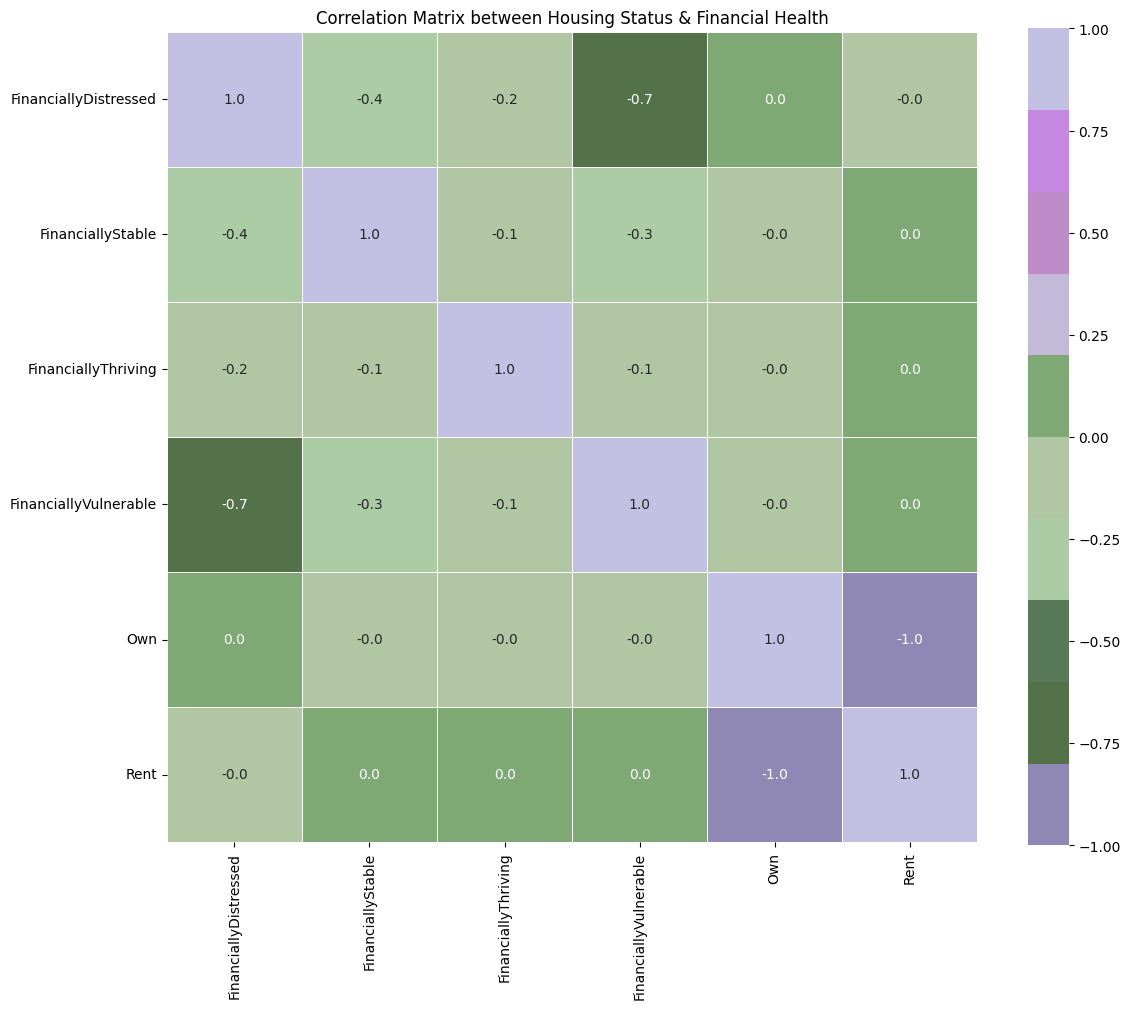

In [28]:
correlationMatrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlationMatrix, annot=True, cmap=customCmap, 
            fmt='.1f', square=True, linewidths=0.5)
plt.title('Correlation Matrix between Housing Status & Financial Health',)
plt.tight_layout()
plt.show()

In [14]:
# creating some cross tables
crosstab01 = pd.crosstab(data['career'], data['financialHealth'])
crosstab02 = pd.crosstab(data['financialHealth'], data['householdType'])
crosstab03 = pd.crosstab(data['ageCategory'], data['career'])
crosstab03

career,Admin,Business,Construction,Education,Engineering,Finance,FoodService,Healthcare,Legal,Manufacturing,PartTime,Research,Retail,Retired,Sales,Service,Technology,Transportation
ageCategory,,,,,,,,,,,,,,,,,,
25-30,98,102,37,98,68,74,65,162,9,100,0,5,147,0,90,31,103,36
30-35,53,28,25,26,19,15,35,58,5,62,0,3,65,0,32,9,39,25
35-40,46,25,19,19,24,21,29,41,2,46,0,1,56,0,31,9,29,22
40-45,33,21,17,17,22,16,30,51,3,30,0,2,46,0,26,14,25,30
45-50,35,17,17,18,16,13,36,46,3,36,0,1,46,0,23,9,16,22
50-55,31,5,25,9,8,8,27,40,1,32,0,0,49,0,16,8,4,19
55-60,15,3,11,6,3,6,9,19,1,19,0,0,29,0,6,5,8,13
60-65,0,0,0,0,0,0,0,0,0,0,32,0,0,81,0,0,0,0
65-70,0,0,0,0,0,0,0,0,0,0,14,0,0,57,0,0,0,0


<Axes: xlabel='ageCategory'>

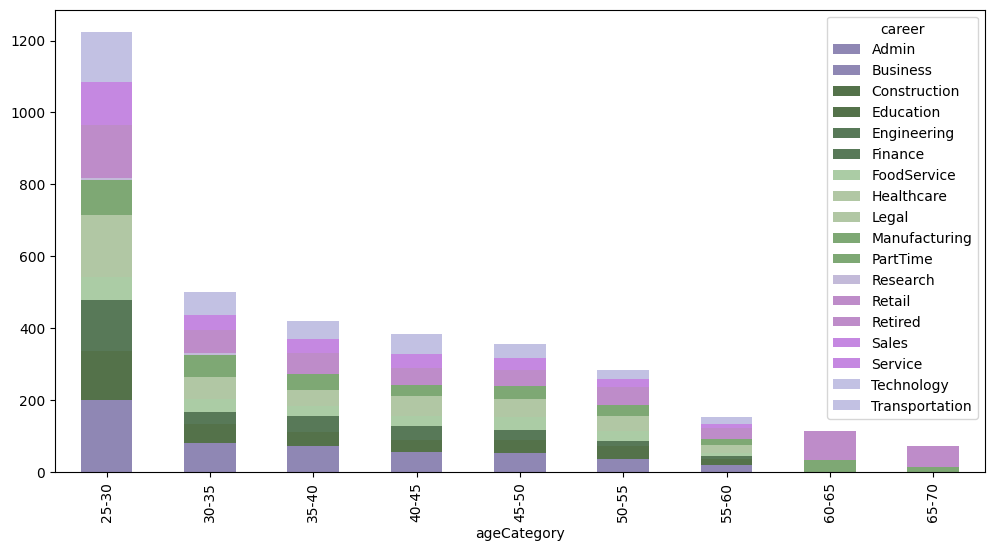

In [25]:
crosstab03.plot(kind='bar', stacked=True, colormap=customCmap, figsize=(12, 6))